# Netflix's movie and series analyses

Netflix is the world's leading OTT streaming platform that offers a wide variety of award-winning TV shows, movies, anime, documentaries, and so on. The last two decades have seen an explosion in the use of digital technology due to the effect of the coronavirus and hence the use of Netflix increased drastically.

I would like to analyze some of its available datas for my project since I have spent most of my free time on Netflix during the pandemic time. Luckily, I found the dataset of movies and TV shows available on Netflix from Kaggle.In this project, I have tried my best to use the skills and techniques that we have already gone through in the course " Zero to Pandas".

In this project, I have used open dataset python library, pandas,matplotlib, and seaborn for visual comparisons of data which will be explained as you go further.

## Downloading the Dataset

In this section, we are loading our data from Kaggle using the opendatasets python library.Opendatasets is a Python library for downloading datasets from online sources like Kaggle using a simple Python command.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./netflix-shows" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './netflix-shows'

In [5]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "gaurab's-netflix-analysis" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "gaurabdhg/gaurab's-netflix-analysis"
[jovian] Committed successfully! https://jovian.ai/gaurabdhg/gaurabs-netflix-analysis-a8f72


'https://jovian.ai/gaurabdhg/gaurabs-netflix-analysis-a8f72'

## Data Preparation and Cleaning

Next we process and clean the data. we reanalyse it, split it into smaller sets so we can analyse it better and handle it easier.



In [10]:
import pandas as pd

In [13]:
data_raw_df= pd.read_csv(data_dir+'/netflix_titles.csv')
data_raw_df.head

<bound method NDFrame.head of      show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Gr

In [14]:
data_raw_df.describe()
data_raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [15]:
data_raw_df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

We'll filter out the data to find information on movies and TV shows separately. We'll not be using the description of the movie or the TV show. 
* First we'll classify and try and understand movies in netflix library.
    <li> Next we'll perform a similar analysis of the TV shows category.
    <li> Finally we'll make a side by side comparision of hte two.

In [16]:
movies_df=data_raw_df.loc[data_raw_df['type'] == "Movie"]
del movies_df ["description"]
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies"


In [17]:
series_df=data_raw_df.loc[data_raw_df['type'] != "Movie"]
shows_df=series_df.drop(columns=['director','cast','description'])
shows_df


,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries"
11,s12,TV Show,1983,"Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas"
12,s13,TV Show,1994,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S..."
16,s17,TV Show,Feb-09,NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas"
...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
7775,s7776,TV Show,Zoids Wild,Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV"
7777,s7778,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
7779,s7780,TV Show,Zona Rosa,Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh..."


In [18]:
nations_shows=shows_df.country.unique()

In [19]:
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gaurabdhg/gaurabs-netflix-analysis-a8f72" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gaurabdhg/gaurabs-netflix-analysis-a8f72


'https://jovian.ai/gaurabdhg/gaurabs-netflix-analysis-a8f72'

## Exploratory Analysis and Visualization

Here in this section we analyse the data, try to gather and percieve some information about the data through lots, charts and graphs.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Netflix Source Distribution

In [24]:
data_raw_df['type'].value_counts()
#returns unique object counts

Movie      5377
TV Show    2410
Name: type, dtype: int64

<AxesSubplot:title={'center':'TV Shows & Movies(Yearwise distribution)'}, xlabel='count', ylabel='release_year'>

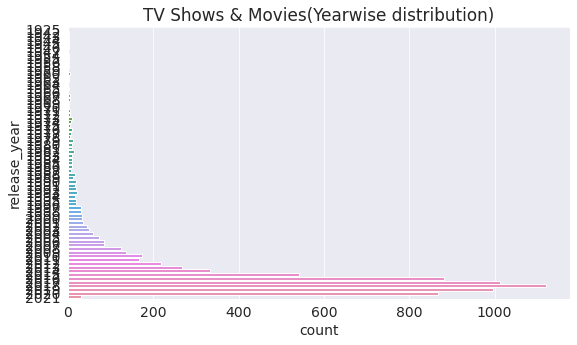

In [32]:
plt.title("TV Shows & Movies(Yearwise distribution)")
sns.countplot(y='release_year',data=data_raw_df)

Representation in  a different format can be a measure

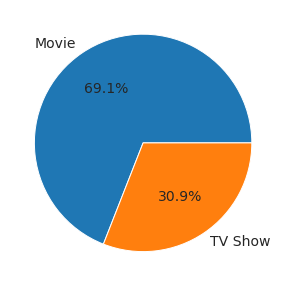

In [33]:
plt.pie(data_raw_df['type'].value_counts(),
       autopct = '%1.1f%%',
       labels = data_raw_df['type'].value_counts().index,
       )
plt.show()

We use autopct to display the percent value using Python string formatting. For example, autopct='%1.1f%%' means that for each pie wedge, the format string is '1.1f%'.

#### Data Analysis by Nation

In [34]:
x = data_raw_df[data_raw_df['country'] != 'Country Unavailable']
content_by_country = x.loc[:, ['country']].value_counts()

           #.loc-accesses a group of rows and columns by label(s) or a boolean array.

content_by_country = pd.DataFrame(content_by_country).reset_index()

In [35]:
content_by_country.columns = ['country', 'count']
content_by_country = content_by_country.head(7)
content_by_country


,country,count
0,United States,2555
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183
5,Canada,177
6,Spain,134


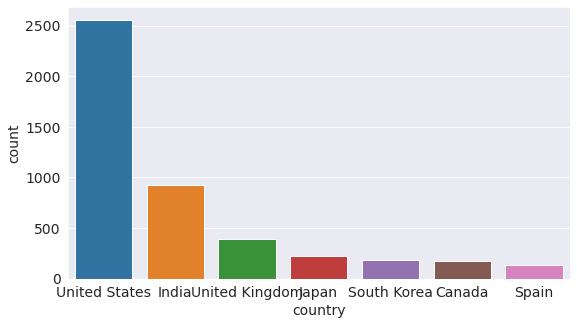

In [36]:
sns.barplot(x='country', y='count',data=content_by_country);

#### Data Analysis by genre

In [37]:
filtered_genres = data_raw_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_genres.value_counts()

International Movies            2437
Dramas                          2106
Comedies                        1471
International TV Shows          1199
Documentaries                    786
Action & Adventure               721
TV Dramas                        704
Independent Movies               673
Children & Family Movies         532
Romantic Movies                  531
TV Comedies                      525
Thrillers                        491
Crime TV Shows                   427
Kids' TV                         414
Docuseries                       353
Romantic TV Shows                333
Stand-Up Comedy                  329
Music & Musicals                 321
Horror Movies                    312
British TV Shows                 232
Reality TV                       222
Sci-Fi & Fantasy                 218
Sports Movies                    196
TV Action & Adventure            150
Korean TV Shows                  150
Anime Series                     148
Spanish-Language TV Shows        147
C

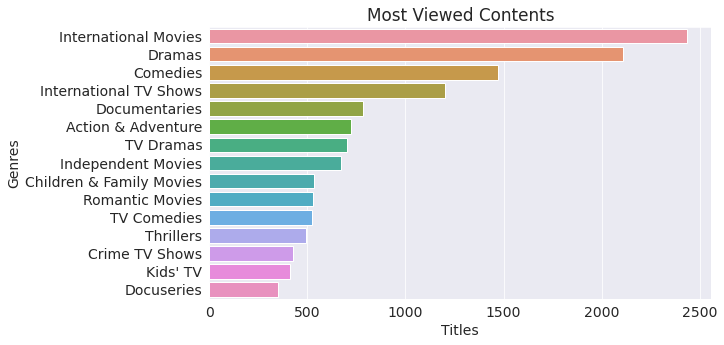

In [38]:
sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:15])
plt.title('Most Viewed Contents')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

Let us save and upload our work to Jovian before continuing

In [39]:
import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gaurabdhg/gaurabs-netflix-analysis-a8f72" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gaurabdhg/gaurabs-netflix-analysis-a8f72


'https://jovian.ai/gaurabdhg/gaurabs-netflix-analysis-a8f72'

## Asking and Answering Questions
In this sectio we try and find answers to some interesting questions about our dataset. We plot the results to make sense of the data


#### Q1: Rank countries based on number of movies in netflix.

In [41]:
country_1 = data_raw_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
country_1.value_counts()

United States     3296
India              990
United Kingdom     722
Canada             412
France             349
                  ... 
Bermuda              1
Cyprus               1
Mongolia             1
Lithuania            1
Cuba                 1
Length: 121, dtype: int64

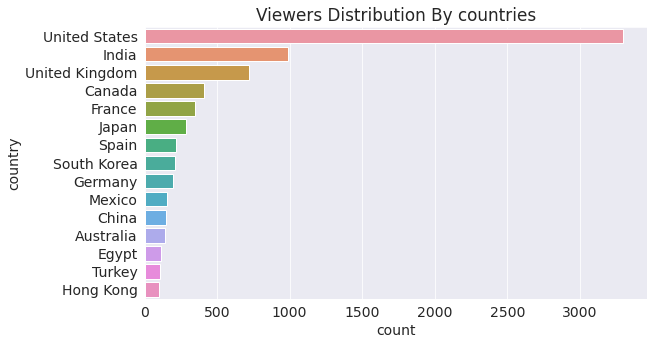

In [42]:
sns.countplot(y = country_1, order=country_1.value_counts().index[:15])
plt.title('Viewers Distribution By countries')
plt.xlabel('count')
plt.ylabel('country')
plt.show()

#### Q2: What are the top 5 rows of type TV Shows from the dataframe.

In [47]:
series_df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [46]:
country_1 = series_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
country_1.value_counts()

United States     866
United Kingdom    256
Japan             184
South Korea       157
Canada            126
                 ... 
Cyprus              1
Switzerland         1
Malta               1
Austria             1
Uruguay             1
Length: 65, dtype: int64

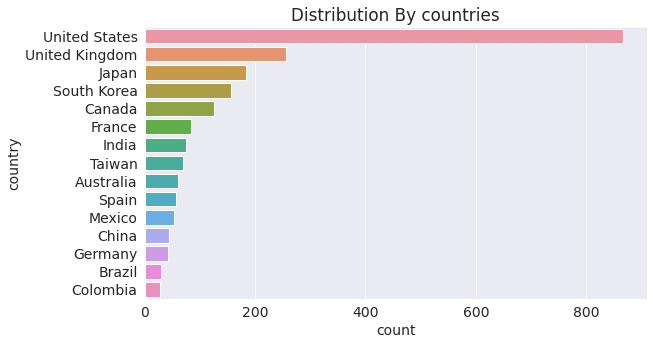

In [48]:
sns.countplot(y = country_1, order=country_1.value_counts().index[:15])
plt.title('Distribution By countries')
plt.xlabel('count')
plt.ylabel('country')
plt.show()

#### Q3: Plot the actors based on number of appearances.

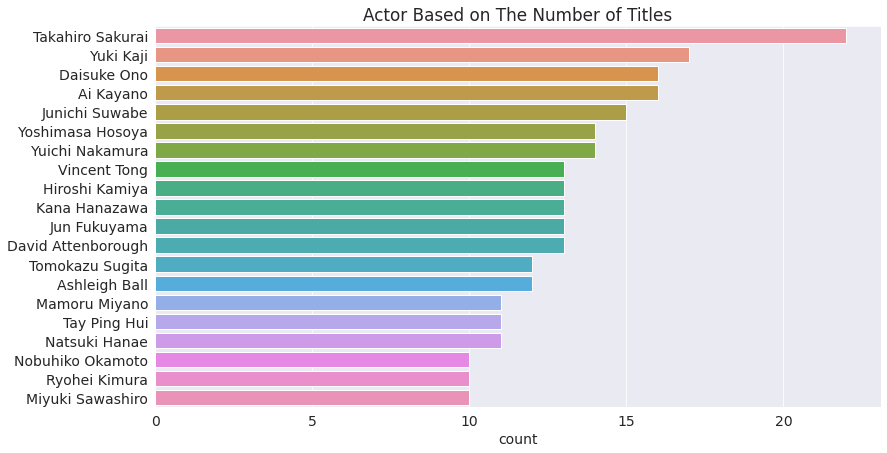

In [49]:
filtered_cast = series_df[series_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Actor Based on The Number of Titles')
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:20])
plt.show()

#### Q4: How many movies and TV shows were released in the USA.

In [52]:
series_df[series_df.country == 'United States']['title'].count()

705

In [56]:
movies_df[movies_df.country == 'United States']['title'].count()

1850

#### Q5: How many titles released in 2016 AD.

In [59]:
movies_df[movies_df.release_year == 2016].shape[0]

642

Let us save and upload our work to Jovian before continuing.

In [60]:
import jovian

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gaurabdhg/gaurabs-netflix-analysis-a8f72" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gaurabdhg/gaurabs-netflix-analysis-a8f72


'https://jovian.ai/gaurabdhg/gaurabs-netflix-analysis-a8f72'

## Inferences and Conclusion

We have gathered interesting information about the dataset in this analysis. Netflix has a widely varied audience base and has worldwide reach however the platform is still highly consumed in the US and the data bias shows that.

Data also shows that there are nearly double the number of movies as TV shows and the pie chart clearly shows this.


In [62]:
import jovian

In [63]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "gaurabdhg/gaurabs-netflix-analysis-a8f72" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/gaurabdhg/gaurabs-netflix-analysis-a8f72


'https://jovian.ai/gaurabdhg/gaurabs-netflix-analysis-a8f72'

## References and Future Work

Original Dataset Link - https://www.kaggle.com/datasets/shivamb/netflix-shows/code

Matplotlib & Seaborn tutorial- https://jovian.ai/aakashns/python-matplotlib-data-visualization

Analyzing tabular data with Pandas -https://jovian.ai/aakashns/python-pandas-data-analysis

In [64]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>